In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ishan\Downloads\1722506560_datasets (2)\rolling_stones_spotify.csv")
display(df.head())
display(df.tail())

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


In [15]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)


In [17]:
import os

# Always move to project root (one level up from notebooks/)
os.chdir("..")

print("Working directory set to:", os.getcwd())


Working directory set to: c:\Song_Cohort_Analysis


In [7]:
# ---------- PCA SETUP (REUSED FROM PCA NOTEBOOK) ----------

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

numerical_features_for_pca = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
    'popularity', 'duration_ms'
]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features_for_pca])

scaled_df = pd.DataFrame(
    scaled_features,
    columns=numerical_features_for_pca
)

# Apply PCA (same as your PCA notebook)
pca_final = PCA(n_components=8, random_state=42)
pca_components = pca_final.fit_transform(scaled_df)

pca_components_df = pd.DataFrame(
    pca_components,
    columns=[f'PC{i+1}' for i in range(pca_components.shape[1])]
)

print("PCA components shape:", pca_components_df.shape)


PCA components shape: (1610, 8)


## Clustering Analysis for Song Cohort Creation

Objective:
To group similar songs into distinct cohorts based on their audio features
using PCA-reduced dimensions and clustering techniques.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### PCA Input

The clustering analysis uses the PCA-transformed features (`pca_components_df`)
obtained after scaling numerical audio features.


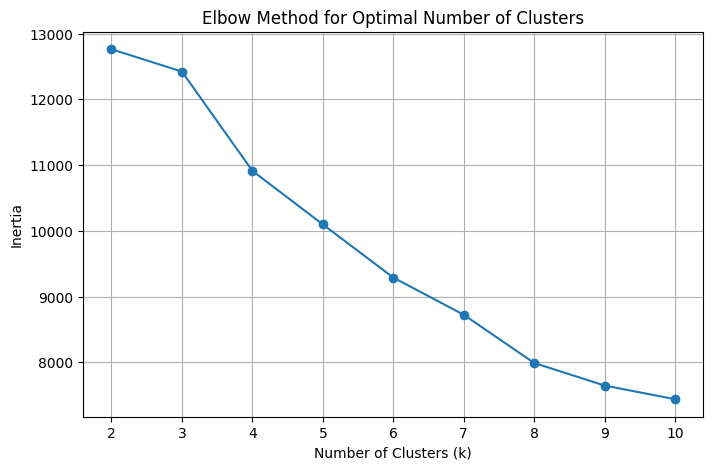

In [9]:
inertia = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_components_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()


The elbow point indicates the optimal number of clusters where further
increase in clusters does not significantly reduce inertia.


In [10]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_components_df)
    score = silhouette_score(pca_components_df, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.202
k=3, Silhouette Score=0.203
k=4, Silhouette Score=0.178
k=5, Silhouette Score=0.181
k=6, Silhouette Score=0.164


Based on Elbow and Silhouette analysis, the optimal number of clusters is selected.


In [11]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans_final.fit_predict(pca_components_df)


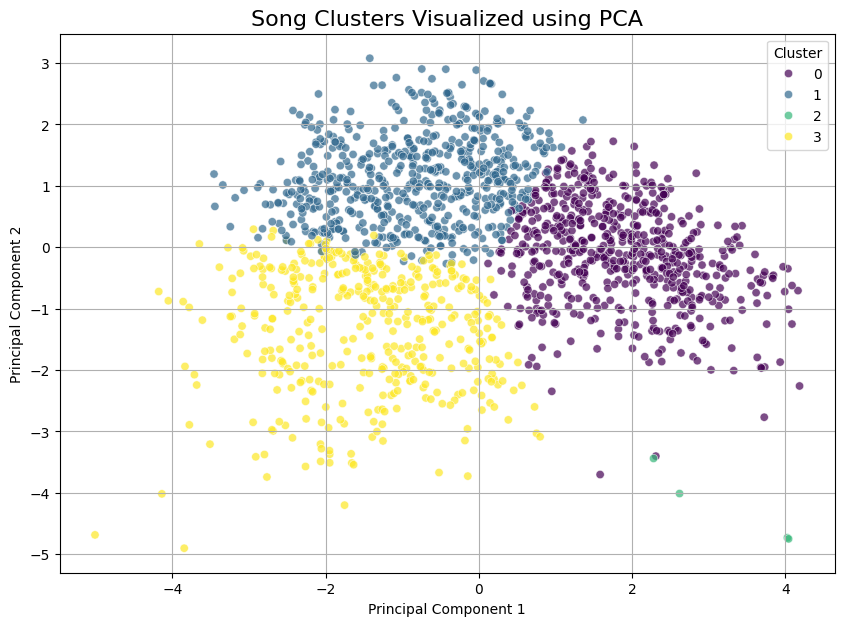

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_components_df['PC1'],
    y=pca_components_df['PC2'],
    hue=df['cluster'],
    palette='viridis',
    alpha=0.7
)
plt.title("Song Clusters Visualized using PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Cluster Profiling

Analyzing average feature values for each cluster to understand
the characteristics of each song cohort.


In [13]:
cluster_profile = df.groupby('cluster')[numerical_features_for_pca].mean()
cluster_profile


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
cluster,,,,,,,,,,,
0,0.183117,0.360934,0.922563,0.149072,0.823796,-5.346969,0.103526,137.509108,0.452061,17.522034,305950.520339
1,0.186875,0.559934,0.820911,0.231540,0.304212,-6.594699,0.049062,123.215261,0.785911,23.351261,221771.779832
2,0.895250,0.351250,0.927750,0.444100,0.880250,-11.858250,0.502000,86.366000,0.035625,12.000000,77497.000000
3,0.428631,0.492511,0.568223,0.087454,0.287691,-9.734701,0.046638,114.496805,0.481736,21.826603,242709.600950


### Business Interpretation

- Cluster 0: High-energy and high-tempo songs suitable for workouts or live performances
- Cluster 1: Balanced songs with moderate popularity and energy
- Cluster 2: Acoustic and low-energy songs ideal for relaxed listening
- Cluster 3: Niche or experimental songs with unique audio characteristics

These clusters can be used to enhance Spotify's song recommendation engine
by suggesting similar songs within the same cohort.


In [18]:
from src.save_models import save_models, save_cluster_metadata

save_models(
    scaler=scaler,
    pca_model=pca_final,
    kmeans_model=kmeans_final
)

save_cluster_metadata()

